<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Google_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install librairies
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Import librairies
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Define the Dates
training_start = "2014-01-01"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-01"

In [39]:
# Download Volkswagen stock
y = ["VOW.DE"]
y = yf.download(y,
                training_start,
                end_stock,
                interval="1wk")
y = y["Adj Close"].rename('y')

[*********************100%***********************]  1 of 1 completed


In [44]:
stocks = ["DIS", "NVS", "CARL-B.CO", "GOOG", "DE"]
X = yf.download(stocks,
                training_start,
                end_stock,
                interval="1wk")
X = X.iloc[:, :len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  5 of 5 completed


,CARL-B.CO,DE,DIS,GOOG,NVS
Date,,,,,
2014-01-01,496.196106,75.910789,70.256927,28.365179,51.769508
2014-01-08,477.542114,75.398048,68.517532,28.627695,52.596832
2014-01-15,495.781647,75.129051,68.287460,28.983862,53.007229
2014-01-22,460.960815,72.783913,67.072639,27.970409,51.828133
2014-01-29,449.353882,71.539902,65.388481,28.347746,50.942181


In [45]:
df_final = pd.concat([y, X], axis=1).dropna()
df_final.head()

,y,CARL-B.CO,DE,DIS,GOOG,NVS
Date,,,,,,
2014-01-01,158.209213,496.196106,75.910789,70.256927,28.365179,51.769508
2014-01-08,155.511795,477.542114,75.398048,68.517532,28.627695,52.596832
2014-01-15,160.824921,495.781647,75.129051,68.287460,28.983862,53.007229
2014-01-22,153.182159,460.960815,72.783913,67.072639,27.970409,51.828133
2014-01-29,143.455032,449.353882,71.539902,65.388481,28.347746,50.942181


In [47]:
df_training = df_final[df_final.index <= training_end].dropna()
df_training.tail()

,y,CARL-B.CO,DE,DIS,GOOG,NVS
Date,,,,,,
2015-07-29,158.745193,509.415436,81.424492,114.076340,31.462500,71.715408
2015-08-05,158.915848,507.704620,84.161682,101.242867,33.039001,70.697540
2015-08-12,149.527710,504.710419,82.124092,100.249199,32.806499,71.473053
2015-08-19,143.212067,424.983337,69.164009,89.890541,29.103001,65.878197
2015-08-26,138.219269,423.101349,69.959816,93.284058,29.889500,65.559677


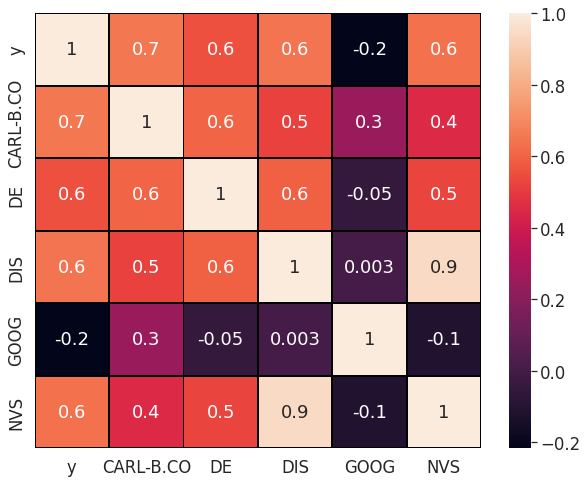

In [48]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(df_training.corr(),
            annot=True,
            fmt=".1g",
            linewidth=1,
            linecolor='black')

In [50]:
# Prepare the dataset
df = df_final.drop("GOOG",axis=1)

In [51]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(x=df.y)[1]
print(p_value)

if p_value > 0.05:
  print("The Time Series is Stationary")
else:
  print("The Time Series is not Stationary")

0.9439757044206007
The Time Series is Stationary


In [52]:
differencing = df_training.pct_change().dropna()

p_value = adfuller(df.y)[1]
print(p_value)

if p_value > 0.05:
  print("The Time Series is Stationary")
else:
  print("The Time Series is not Stationary")

0.9439757044206007
The Time Series is Stationary


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


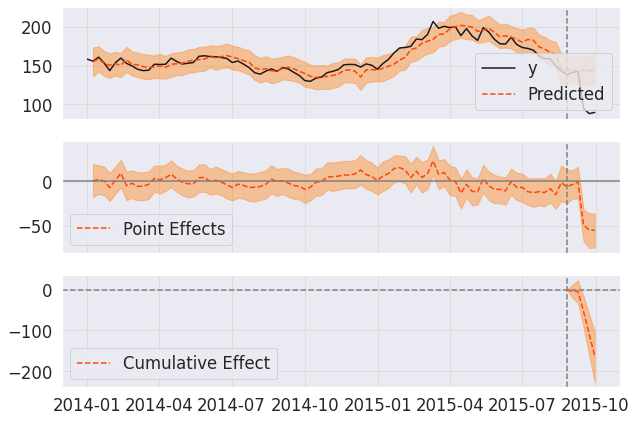

In [55]:
# Prepare pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]
# Google Cause Impact
impact = CausalImpact(df,
                      post_period=post_period,
                      pre_period=pre_period)
impact.plot()

In [56]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    111.26             556.29
Prediction (s.d.)         143.84 (6.39)      719.19 (31.93)
95% CI                    [131.38, 156.41]   [656.9, 782.07]

Absolute effect (s.d.)    -32.58 (6.39)      -162.9 (31.93)
95% CI                    [-45.16, -20.12]   [-225.78, -100.61]

Relative effect (s.d.)    -22.65% (4.44%)    -22.65% (4.44%)
95% CI                    [-31.39%, -13.99%] [-31.39%, -13.99%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
